In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Regression With One Variable

In [2]:
df = pd.read_csv('ex1data1.txt')

#### Data are:
* Population in 10 000s 
* Profit in $10 000s 

In [3]:
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
df.columns

Index(['Population', 'Profit'], dtype='object')

In [5]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


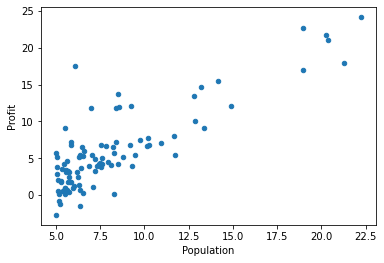

In [7]:
df.plot(x="Population",
       y="Profit",
       kind="scatter");

In [8]:
y = df["Profit"]

In [9]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profit, Length: 97, dtype: float64

In [10]:
# Number of examples(m)
m = len(y)
m

97

In [11]:
ones = np.ones((1,m))
ones.shape

(1, 97)

In [12]:
df_arr = np.array(df["Population"], ndmin=2).T
df_arr.shape

(97, 1)

Create a m*2 matrix where first column is $\theta_{0}$ and second column is $\theta_{1}$

In [13]:
# Create a m*2 matrix with 
X = np.insert(df_arr, 0, ones, axis=1)
X[:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [14]:
# Initial Guess
# theta0 = 0 and theta1 = 0
theta = [0, 0]

In [15]:
# Number of iterations
iterations = 1500
# Learning Rate
alpha = 0.02


### Cost Function
$J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)})- y^{(i)})^{2}$

#### Hypothesis
$h(\Theta) = \Theta_{0}x_{0} + \Theta_{1}x_{1}$

In [16]:
# Function to calculate cost function
def computeCost(X, y, theta):
    m = len(X)
    sq_sum_err = 0
    hypo_value = 0
    for i in range(m):
        hypo_value = (theta[0] * X[i,0]) + (theta[1] * X[i,1])
        sq_sum_err += np.square(hypo_value - y[i])
    J = sq_sum_err / (2*m)
    return J

computeCost(X, y, theta)
        

32.072733877455654

### Gradient Descent Algorithm
$\Theta_{j} = \Theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\Theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}$  (simultaneously update $\Theta_{j}$ for all $j$)

In [17]:


def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = np.zeros((num_iters, 1))
    
    
    for iter in range(num_iters):
        
        J = computeCost(X, y, theta)
        print(J, theta[0], theta[1])
        
        J_history[iter] = J
        
        
        pd0 = theta[0] - alpha * (1/m) * sum((np.sum((X*theta),axis=1) - y) * X[:,0])
        pd1 = theta[1] - alpha * (1/m) * sum((np.sum((X*theta),axis=1) - y) * X[:,1])
        
        theta[0] = pd0
        theta[1] = pd1
        

        
        
    
    return [theta[0], theta[1]], J_history

In [18]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

32.072733877455654 0 0
16.769642371667494 0.1167827010309278 1.3065769949111348
10.407579751768981 0.01800160877971954 0.4668851404174771
7.759183480302348 0.05823049025948237 1.0103985192819036
6.653287534646758 0.008955584732491008 0.6624640652822501
6.188105823037992 0.01744768847096694 0.8890358067492418
5.989084519364207 -0.011205651785773828 0.7453450091050496
5.900653772925786 -0.01583616182503819 0.8402702714870821
5.858197920163228 -0.03586548478321545 0.7814054019591585
5.834878785201406 -0.04588771003475013 0.8216458872863022
5.819548934223243 -0.062276577024702656 0.7980072763515389
5.807578027277279 -0.07447993992474651 0.8155287856125966
5.797042577385664 -0.08929867579215706 0.8065154361246224
5.787143381054757 -0.10235009435917997 0.8145948887823524
5.777548203870703 -0.11645901891079333 0.8116502947008781
5.768118767375577 -0.12980521899565414 0.8158022520353793
5.758797354060331 -0.14356207790797898 0.8153725418897819
5.749559709152845 -0.15697367266513643 0.817887498

4.7949252618037494 -2.0269614579370723 1.00529046266791
4.79263682499589 -2.0336989100929554 1.0059673128168893
4.790364858950798 -2.0404120724426336 1.0066417227913678
4.788109245122034 -2.047101032555513 1.0073137013886428
4.7858698658163865 -2.053765877685296 1.007983257374295
4.783646604187735 -2.0604066947711175 1.008650399482303
4.78143934423093 -2.067023570438681 1.0093151364151594
4.779247970775769 -2.0736165910013877 1.0099774768439806
4.777072369480965 -2.0801858424614625 1.0106374294086231
4.7749124268282 -2.0867314105110752 1.0112950027177954
4.772768030116183 -2.093253380533459 1.0119502053491687
4.770639067454781 -2.099751837604025 1.0126030458494915
4.768525427759169 -2.1062268664914705 1.0132535327346983
4.766427000744059 -2.112678551658885 1.013901674490023
4.764343676917911 -2.1191069772648534 1.0145474795701082
4.762275347577254 -2.1255122271645517 1.0151909563991162
4.760221904800982 -2.131894384910843 1.0158321133708377
4.758183241444749 -2.138253533755366 1.016470

4.536477234574436 -3.0873085999565104 1.111813834476745
4.5360489479480695 -3.0902232974577193 1.1121066474559358
4.535623743865821 -3.093127486915856 1.1123984047882218
4.535201600141422 -3.09602120621443 1.1126891102794114
4.534782494748315 -3.098904493100372 1.1129787677215939
4.534366405818436 -3.1017773851845303 1.1132673808931866
4.5339533116411515 -3.1046399199421564 1.1135549535589848
4.533543190662063 -3.1074921347133975 1.113841489470212
4.53313602148192 -3.1103340667037824 1.1141269923645667
4.5327317828554765 -3.113165752984707 1.1144114659662725
4.532330453690422 -3.115987230493917 1.114694913986127
4.531932013046231 -3.1187985360359907 1.1149773401215495
4.531536440133109 -3.1215997062828196 1.1152587480566285
4.531143714310882 -3.1243907777740847 1.115539141462172
4.530753815087942 -3.1271717869177356 1.115818523995753
4.530366722120163 -3.129942769990464 1.116096899301759
4.529982415209844 -3.132703763138177 1.1163742710114384
4.5296008743046565 -3.135454802376468 1.116

4.491625661801567 -3.4945747121846824 1.1527281329916594
4.491520189251702 -3.496021137301768 1.1528734420837818
4.491415475828479 -3.4974623477791096 1.1530182273087788
4.491311516068168 -3.498898362416483 1.1531624905552933
4.491208304546366 -3.500329199945887 1.153306233705157
4.4911058358777165 -3.5017548790317883 1.153449458633418
4.491004104715617 -3.503175418271364 1.1535921672083644
4.49090310575194 -3.504590836194745 1.1537343612915496
4.490802833716783 -3.506001151265258 1.153876042737814
4.490703283378156 -3.5074063818796652 1.1540172133953128
4.49060444954173 -3.5088065463684055 1.1541578751055366
4.4905063270505625 -3.510201662995833 1.1542980297033387
4.490408910784827 -3.5115917499604543 1.1544376790169557
4.490312195661548 -3.5129768253951683 1.1545768248680348
4.490216176634331 -3.514356907367501 1.1547154690716541
4.490120848693105 -3.5157320138798407 1.1548536134363494
4.490026206863852 -3.5171021628696746 1.1549912597641356
4.489932246208371 -3.518467372209821 1.155

4.479919400734926 -3.715831299945465 1.1749557571622766
4.4798981826631525 -3.716480052661483 1.1750209314095035
4.479877117306026 -3.717126466499631 1.175085870691079
4.479856203564405 -3.7177705498920117 1.1751505758540994
4.479835440347054 -3.7184123112403293 1.1752150477426067
4.479814826570589 -3.7190517589159975 1.1752792871976006
4.479794361159426 -3.719688901260249 1.175343295057048
4.479774043045726 -3.7203237465842465 1.1754070721558953
4.479753871169331 -3.7209563031691872 1.1754706193260793
4.479733844477713 -3.7215865792664147 1.175533937396536
4.479713961925924 -3.7222145830975237 1.1755970271932146
4.4796942224765335 -3.722840322854469 1.1756598895390853
4.479674625099574 -3.7234638066996726 1.175722525254152
4.479655168772498 -3.724085042766128 1.1757849351554623
4.47963585248012 -3.7247040391575084 1.1758471200571181
4.479616675214549 -3.725320803948272 1.1759090807702859
4.47959763597516 -3.7259353451837662 1.1759708181032087
4.479578733768522 -3.7265476708803345 1.17

4.477681811704491 -3.807442856949329 1.1841591317572449
4.477676698424404 -3.80776133244567 1.1841911260752982
4.477671621946569 -3.808078659776813 1.1842230050477034
4.477666582006106 -3.8083948430821137 1.1842547690903038
4.477661578340037 -3.808709886486005 1.1842864186174433
4.477656610687283 -3.8090237940980494 1.1843179540419722
4.477651678788641 -3.809336570012994 1.184349375775252
4.47764678238678 -3.8096482183108247 1.1843806842271614
4.477641921226208 -3.809958743056816 1.1844118798061019
4.477637095053286 -3.8102681483015886 1.1844429629190019
4.477632303616196 -3.810576438081158 1.1844739339713228
4.477627546664927 -3.8108836164169912 1.1845047933670647
4.4776228239512665 -3.811189687316055 1.1845355415087715
4.4776181352288065 -3.8114946547708715 1.1845661787975341
4.477613480252889 -3.8117985227595685 1.184596705633
4.477608858780628 -3.8121012952459323 1.184627122413373
4.4776042705708825 -3.8124029761794587 1.1846574295354244
4.47759971538426 -3.8127035694954046 1.18468

4.4771540817417845 -3.850982592369038 1.1885331704477617
4.477152766737882 -3.8511440987751224 1.1885493955180835
4.47715146119857 -3.8513050229196613 1.1885655620939173
4.477150165055725 -3.8514653669018193 1.1885816703861471
4.477148878241721 -3.8516251328131927 1.1885977206048965
4.477147600689414 -3.8517843227378377 1.1886137129595313
4.477146332332142 -3.8519429387522965 1.1886296476586629
4.4771450731037294 -3.852100982925626 1.1886455249101502
4.47714382293847 -3.8522584573194223 1.1886613449211032
4.4771425817711314 -3.8524153639878502 1.188677107897885
4.477141349536955 -3.8525717049776684 1.1886928140461144
4.4771401261716415 -3.852727482328257 1.18870846357067
4.477138911611361 -3.8528826980716433 1.18872405667569
4.477137705792739 -3.8530373542325287 1.1887395935645781
4.47713650865286 -3.853191452828315 1.1887550744400046
4.477135320129254 -3.853344995869132 1.188770499503908
4.477134140159917 -3.853497985357861 1.1887858689575002
4.477132968683273 -3.8536504232901643 1.18

4.4770166964315985 -3.873469191376788 1.190792193226148
4.477016370242786 -3.8735496292840588 1.1908002740864285
4.477016046401677 -3.8736297771972588 1.1908083258136595
4.477015724891383 -3.873709636161872 1.1908163485128707
4.477015405695119 -3.873789207219613 1.1908243422887135
4.477015088796235 -3.873868491408442 1.1908323072454625
4.477014774178191 -3.8739474897625756 1.190840243487016
4.477014461824581 -3.8740262033125035 1.1908481511168978
4.477014151719098 -3.8741046330849986 1.1908560302382587
4.477013843845559 -3.874182780103134 1.1908638809538767
4.477013538187912 -3.8742606453862924 1.1908717033661607
4.4770132347301965 -3.8743382299501827 1.190879497577149
4.477012933456584 -3.8744155348068516 1.1908872636885133
4.477012634351353 -3.8744925609646974 1.1908950018015576
4.477012337398898 -3.8745693094284825 1.1909027120172213
4.47701204258373 -3.8746457811993475 1.1909103944360804
4.477011749890453 -3.8747219772748234 1.1909180491583469
4.477011459303803 -3.8747978986488447 

In [19]:
theta

[-3.8781376908655907, 1.1912611946381648]

Using $J(\theta)$ to minimize $\theta_{0}$ and $\theta_{1}$. <br>
$\theta_{0}$ = -3.878 <br>
$\theta_{1}$ = 1.191

In [20]:
J_history[:10]

array([[32.07273388],
       [16.76964237],
       [10.40757975],
       [ 7.75918348],
       [ 6.65328753],
       [ 6.18810582],
       [ 5.98908452],
       [ 5.90065377],
       [ 5.85819792],
       [ 5.83487879]])

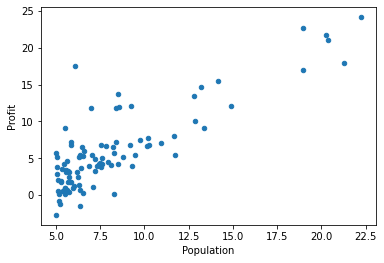

In [21]:
df.plot(x="Population",
       y="Profit",
       kind="scatter");


In [22]:
df["Predict"] = np.dot(X, theta)
df["Predict"]

0      3.400587
1      2.706797
2      6.269740
3      4.464503
4      3.102415
        ...    
92     3.115399
93     2.441979
94     6.001468
95    12.077615
96     2.598630
Name: Predict, Length: 97, dtype: float64

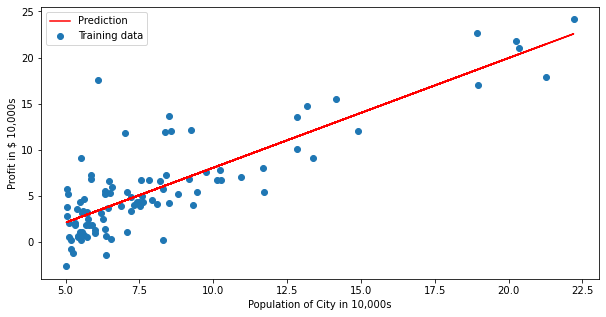

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df["Population"], df["Profit"], label="Training data")
plt.plot(df["Population"], df["Predict"], color="red", label="Prediction" )
plt.ylabel("Profit in $ 10,000s")
plt.xlabel("Population of City in 10,000s")


plt.legend()
plt.show();


In [24]:
predict1 = np.dot([1, 3.5], theta)
print(f'For population = 35,000, we predict a profit of {predict1*10000}')
predict2 = np.dot([1, 7], theta)
print(f'For population = 70,000, we predict a profit of {predict2*10000}')

For population = 35,000, we predict a profit of 2912.7649036798653
For population = 70,000, we predict a profit of 44606.906716015634


In [25]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

In [26]:
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)));

In [27]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i,j] = computeCost(X, y, t)

In [28]:
print(theta0_grid.shape)
print(theta1_grid.shape)
print(J_vals.shape)

(100, 100)
(100, 100)
(100, 100)


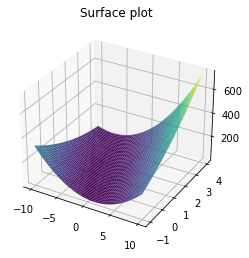

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(theta0_grid, theta1_grid, J_vals,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

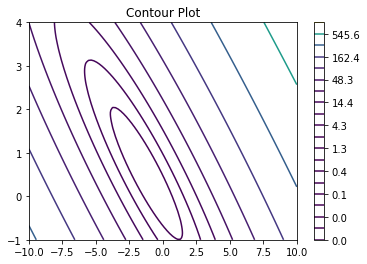

In [30]:


fig,ax=plt.subplots()
cp = ax.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
ax.set_title('Contour Plot')
fig.colorbar(cp);